# Cars Fuel Efficiency & Performance Analysis



---

### Table of Contents
1. [Introduction](#introduction)
2. [Data Loading & Cleaning](#data-cleaning)
3. [Exploratory Data Analysis](#eda)
4. [SQL Queries](#sql)
5. [Python Visualizations](#python)
6. [Power BI Dashboard](#powerbi)
7. [Conclusion](#conclusion)

---

## Introduction <a name="introduction"></a>

This project analyzes a dataset of cars with the goal of uncovering insights into fuel efficiency, engine performance and vehicle characteristics.
Using Excel for initial cleaning, SQL for structured queries, Python for visualizations and Power BI for interactive Dashboard, we explore the following questions:

* Which car manufacturers produce the most fuel-efficient vehicles?
* How do horsepower relate to fuel efficiency?
* How does the number of cylinders affect MPG (Miles Per Gallon)?
* How does engine displacement relate to MPG?
* Which Fuel type is most efficient on average and most common?
* Which Top 10 Cars has the best horsepower-to-MPG ratio?
* How does engine configuration affect fuel efficiency at different horsepower levels? Can we identify which engine types deliver the best MPG for their power class?

The outcome is a set of insights that can help consumers, manufacturers, and researchers better understand the relationship between car design and efficiency.

---

## Data Loading & Cleaning <a name="data-cleaning"></a>

**Steps Taken:**
* Original Dataset loaded in **Excel**
* Cleaned missing or inconsistent values
* Combined **City MPG** and **highway MPG** into a single `mpg` column.
* Split complex `engine_type` strings into separate fields: make was already there as well as horsepower and torque but cylinders and engine_size wasn't so we split `engine_type` to get `cylinders` and `engine_size`.

📂 Cleaned dataset saved as: `data/cleaned/cars_cleaned.csv`



In [5]:
import pandas as pd

# Load Cleaned dataset (Excel > saved to csv)
cars = pd.read_csv("../data/clean/cars_cleaned.csv")

# Preview
cars.head()

,height,length,width,driverline,engine_type,hybrid,n_forward_gears,transmission,fuel_type,classification,id,make,model_year,year,horsepower,torque,mpg,engine_size,cylinders
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,43,3.2,6
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,50,2.0,4
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,Gasoline,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,51,2.0,4
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,49,2.0,4
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,Gasoline,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,49,2.0,4


In [6]:
# Check basic info
cars.info()

# Summary stats
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   height           5076 non-null   int64  
 1   length           5076 non-null   int64  
 2   width            5076 non-null   int64  
 3   driverline       5076 non-null   object 
 4   engine_type      5076 non-null   object 
 5   hybrid           5076 non-null   bool   
 6   n_forward_gears  5076 non-null   int64  
 7   transmission     5076 non-null   object 
 8   fuel_type        5076 non-null   object 
 9   classification   5076 non-null   object 
 10  id               5076 non-null   object 
 11  make             5076 non-null   object 
 12  model_year       5076 non-null   object 
 13  year             5076 non-null   int64  
 14  horsepower       5076 non-null   int64  
 15  torque           5076 non-null   int64  
 16  mpg              5076 non-null   int64  
 17  engine_size   

,height,length,width,n_forward_gears,year,horsepower,torque,mpg,engine_size,cylinders
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,2010.867612,270.499409,272.707250,41.401300,3.727660,6.105792
std,62.125026,77.358295,79.925899,0.845637,0.782951,95.293537,100.123328,10.605692,1.381114,1.770040
min,1.000000,2.000000,1.000000,4.000000,2009.000000,100.000000,98.000000,19.000000,1.300000,2.000000
25%,104.000000,60.000000,62.000000,5.000000,2010.000000,190.000000,187.000000,34.000000,2.500000,4.000000
50%,152.000000,128.000000,158.000000,6.000000,2011.000000,266.000000,260.000000,41.000000,3.600000,6.000000
75%,193.000000,198.000000,219.000000,6.000000,2011.000000,317.000000,335.000000,48.000000,5.000000,8.000000
max,255.000000,255.000000,254.000000,8.000000,2012.000000,638.000000,774.000000,243.000000,8.400000,12.000000


## Exploratory Data Analysis <a name="eda"></a>

In [ ]:
# Number of unique car makes
print("Unique car makes:", cars["make"].nunique())
print("First 10 makes:", cars["make"].unique()[:10])

# Check fuel types
cars['fuel_type'].value_counts()

## SQL Queries <a name="sql"></a>

In [16]:
%%sql
-- Q1: Top 10 car makes by Average MPG

SELECT make, ROUND(AVG(mpg), 2) AS average_mpg
FROM cars
GROUP BY make
ORDER BY average_mpg DESC
LIMIT 10;

,make,average_mpg
0,MINI,60.03
1,Kia,54.02
2,Scion,53.00
3,Honda,52.43
4,Volkswagen,52.07
5,Hyundai,51.96
6,Mazda,48.48
7,Lotus,46.36
8,Subaru,46.24
9,Saab,45.88


In [17]:
%%sql
-- Q2: Horsepower vs MPG

SELECT make, model_year, horsepower, mpg
FROM cars;

,make,model_year,horsepower,mpg
0,Audi,2009 Audi A3,250,43
1,Audi,2009 Audi A3,200,50
2,Audi,2009 Audi A3,200,51
3,Audi,2009 Audi A3,200,49
4,Audi,2009 Audi A3,200,49
...,...,...,...,...
5071,Honda,2012 Honda Pilot,250,43
5072,Lamborghini,2012 Lamborghini Gallardo Coup,552,32
5073,Lamborghini,2012 Lamborghini Gallardo Spyder,552,32
5074,BMW,2012 BMW 7 Series,315,42


In [18]:
%%sql
-- Q3: Cylinders vs MPG

SELECT cylinders, AVG(mpg) AS Average_mpg
FROM cars
GROUP BY cylinders
ORDER BY Average_mpg DESC;

,cylinders,Average_mpg
0,4,52.492986
1,5,46.602484
2,6,40.480115
3,2,38.400000
4,8,32.204487
5,12,28.737500
6,10,27.666667


In [19]:
%%sql
-- Q4: Engine Size vs Fuel Efficiency

SELECT engine_size, mpg
FROM cars;

,engine_size,mpg
0,3.2,43
1,2.0,50
2,2.0,51
3,2.0,49
4,2.0,49
...,...,...
5071,3.5,43
5072,5.2,32
5073,5.2,32
5074,3.0,42


In [20]:
%%sql
-- Q5: Most Efficient Fuel type on Average and most Common

SELECT fuel_type, COUNT(*) AS count, ROUND(AVG(mpg),2) AS Average_mpg
FROM cars
GROUP BY fuel_type
ORDER BY Average_mpg DESC;

,fuel_type,count,Average_mpg
0,Compressed natural gas,2,60.00
1,Diesel fuel,27,53.04
2,Gasoline,4591,42.87
3,E85,456,25.88


In [21]:
%%sql
-- Q6: Top Performance Cars by Efficiency

SELECT make, model_year, horsepower, mpg, ROUND((horsepower/mpg),2) AS hp_to_mpg_ratio
FROM cars
ORDER BY hp_to_mpg_ratio DESC
LIMIT 10;

,make,model_year,horsepower,mpg,hp_to_mpg_ratio
0,Bentley,2011 Bentley Continental Supersports Convertible,621,22,28.23
1,Bentley,2012 Bentley Continental Supersports Convertible,621,22,28.23
2,Bentley,2012 Bentley Continental Supersports Coupe,621,22,28.23
3,Bentley,2012 Bentley Continental Flying Spur,552,21,26.29
4,Bentley,2012 Bentley Continental GT,567,22,25.77
5,Maybach,2010 Maybach 57,631,26,24.27
6,Maybach,2010 Maybach 62,631,26,24.27
7,Maybach,2010 Maybach 57,631,26,24.27
8,Maybach,2011 Maybach 57,620,26,23.85
9,Maybach,2011 Maybach 62,620,26,23.85


In [22]:
%%sql
-- Q7: Top Efficiency by Engine Type and Horsepower

SELECT
	cylinders,
	CASE
		WHEN horsepower <= 150 THEN '0-150'
        WHEN horsepower <= 200 THEN '151-200'
        WHEN horsepower <= 250 THEN '201-250'
        ELSE '250+'
	END AS hp_range,
    ROUND(AVG(mpg),2) AS avg_mpg,
    ROUND(AVG(engine_size),2) AS avg_engine_size,
    COUNT(*) AS count
FROM cars
GROUP BY cylinders, hp_range
ORDER BY cylinders, hp_range;

,cylinders,hp_range,avg_mpg,avg_engine_size,count
0,2,201-250,38.40,1.30,10
1,4,0-150,60.01,1.79,420
2,4,151-200,49.99,2.39,876
3,4,201-250,48.17,2.04,156
4,4,250+,46.04,2.24,45
5,5,151-200,53.98,2.49,54
6,5,201-250,42.88,3.29,106
7,5,250+,43.00,2.50,1
8,6,151-200,36.77,3.86,44
9,6,201-250,39.40,3.41,457


## Python Visualizations <a name="python"></a>

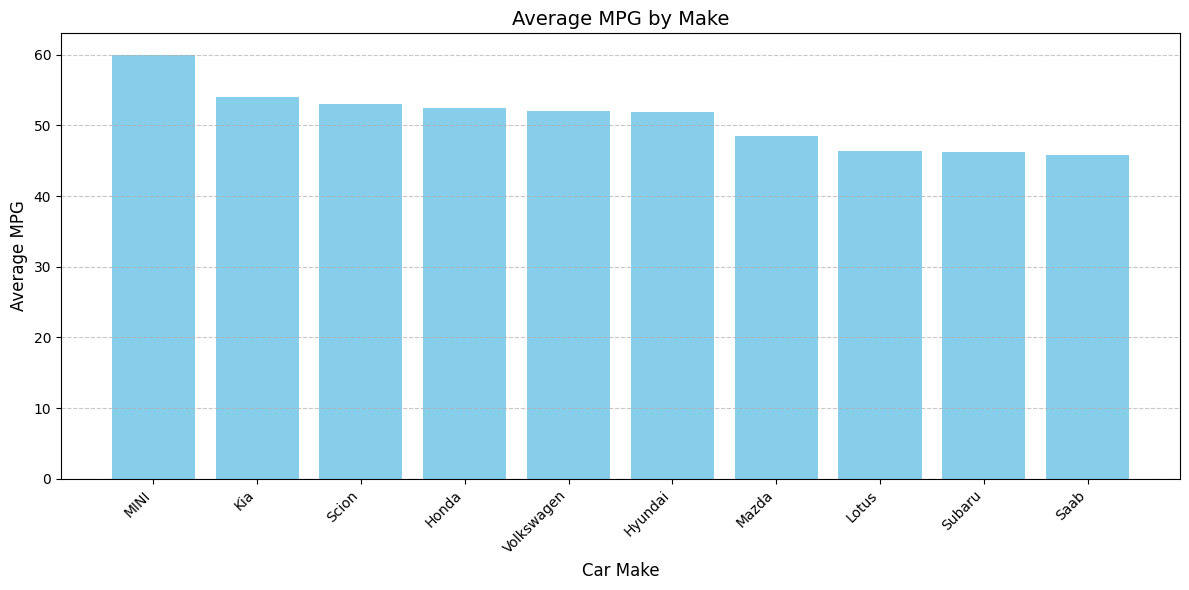

In [7]:
import matplotlib.pyplot as plt

# Q1. Top 10 Car Makes by Average MPG

file_path = r"..\results\q01_avg_mpg_by_make.csv"
avg_mpg_by_make = pd.read_csv(file_path)

plt.figure(figsize=(12,6))

plt.bar(avg_mpg_by_make['make'], avg_mpg_by_make['Average_mpg'], color="skyblue")

plt.xticks(rotation=45, ha="right")

plt.title('Average MPG by Make', fontsize=14)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Average MPG', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

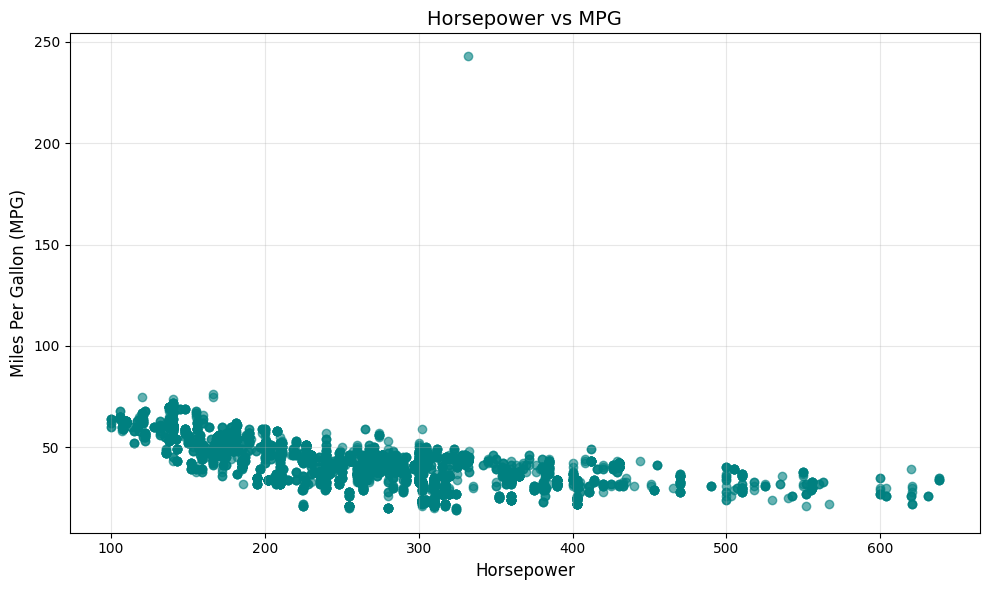

In [8]:
# Q2: Horsepower vs MPG (Scatter Plot)

file_path = r"..\results\q02_hp_vs_mpg.csv"
hp_vs_mpg = pd.read_csv(file_path)


plt.figure(figsize=(10,6))
plt.scatter(hp_vs_mpg['horsepower'], hp_vs_mpg['mpg'], alpha=0.6, color="teal")

plt.title("Horsepower vs MPG", fontsize=14)
plt.xlabel("Horsepower", fontsize=12)
plt.ylabel("Miles Per Gallon (MPG)", fontsize=12)

plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

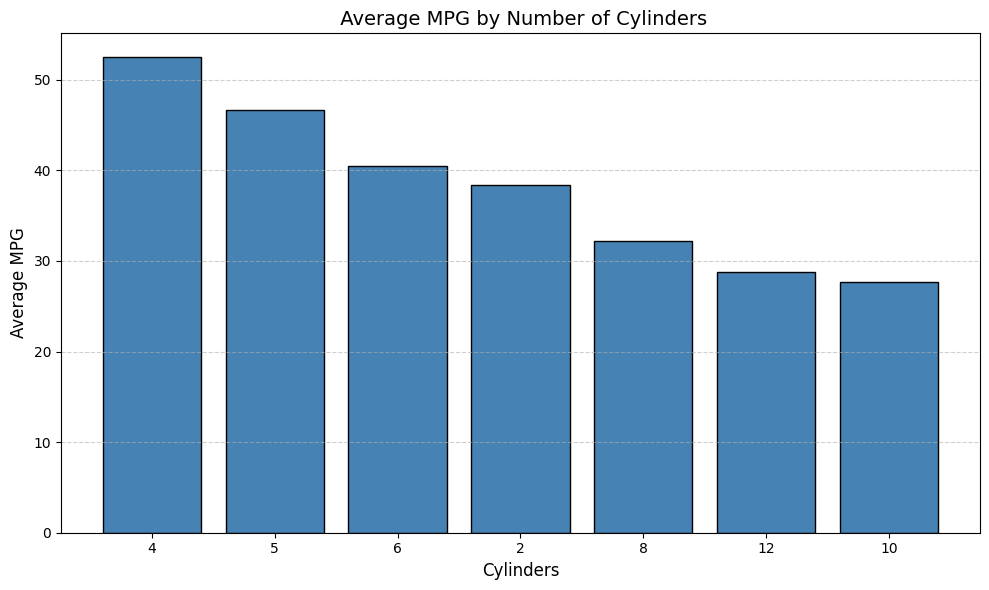

In [9]:
# Q3: Cylinders vs MPG

file_path = r"..\results\q03_cylinders_vs_mpg.csv"

cylinders_vs_mpg = pd.read_csv(file_path)

plt.figure(figsize = (10,6))

plt.bar(cylinders_vs_mpg["cylinders"].astype(str),
        cylinders_vs_mpg["Average_mpg"],
        color='steelblue', edgecolor='black')

plt.title(" Average MPG by Number of Cylinders", fontsize=14)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("Average MPG", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


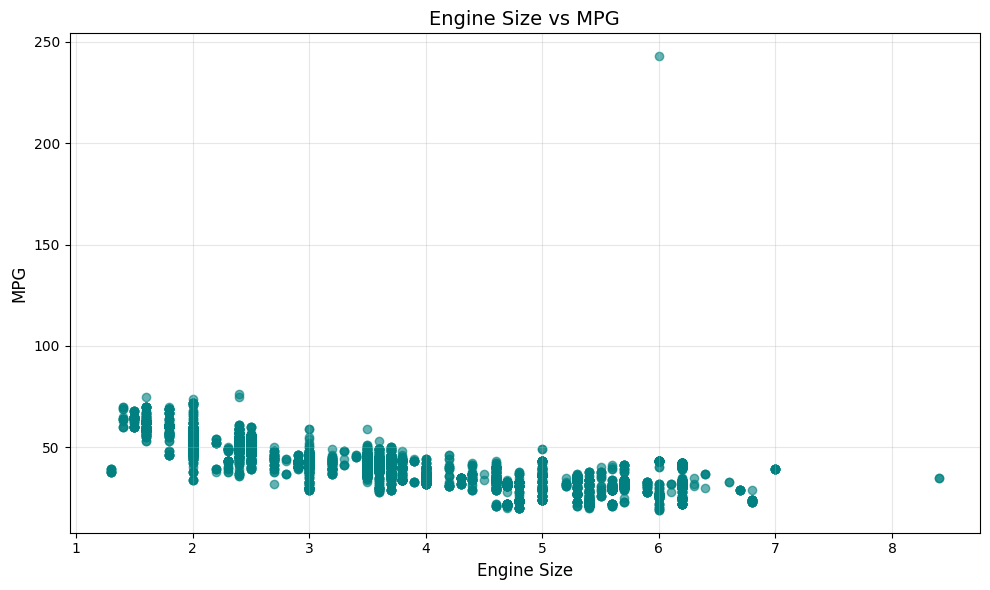

In [10]:
# Q4: Engine Size vs MPG (Scatter Plot)

file_path = r"..\results\q04_engine_size_vs_mpg.csv"

engine_size_vs_mpg = pd.read_csv(file_path)

plt.figure(figsize=(10,6))

plt.scatter(engine_size_vs_mpg["engine_size"], engine_size_vs_mpg["mpg"], alpha=0.6, color="teal")

plt.title("Engine Size vs MPG", fontsize=14)
plt.xlabel("Engine Size", fontsize=12)
plt.ylabel("MPG", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

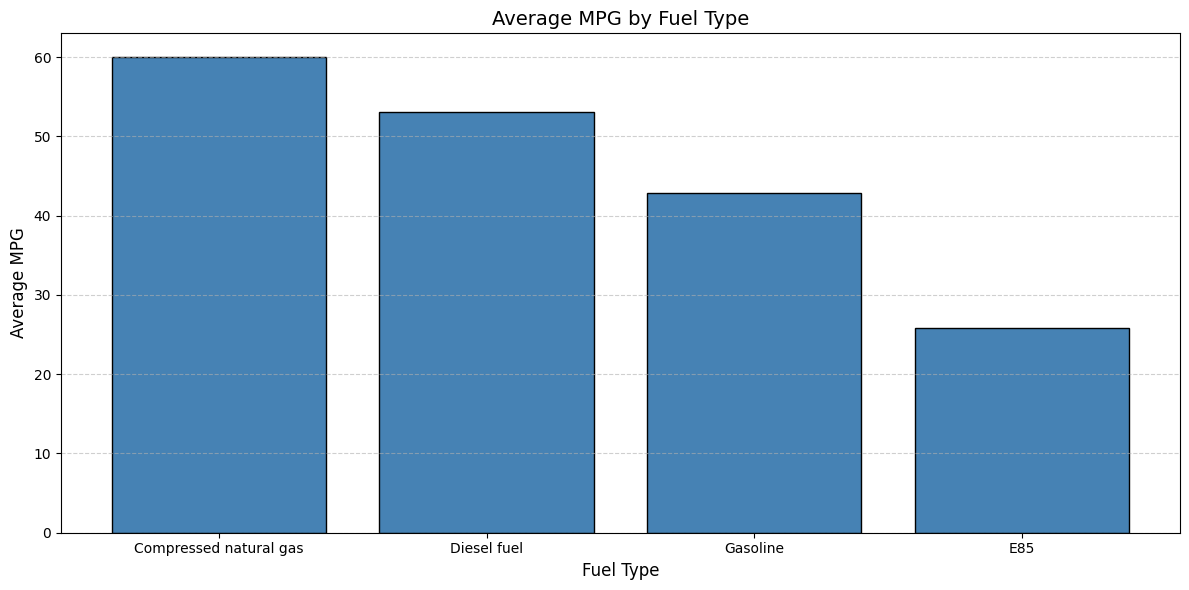

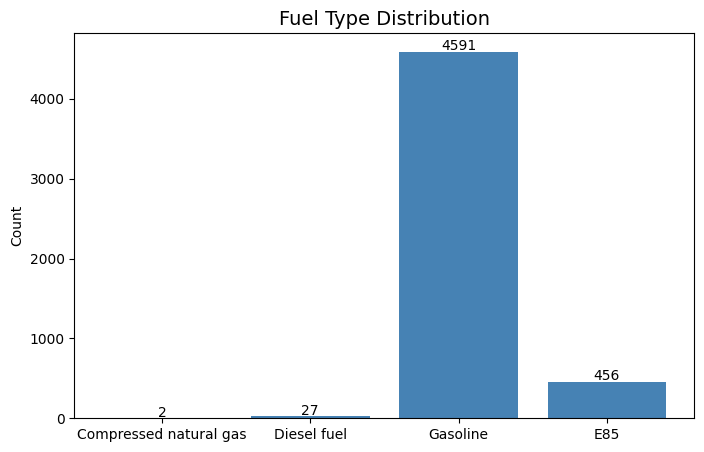

In [13]:
# Q5: Most Efficient Fuel type on Average and most Common

file_path = r"..\results\q05_most_common_fuel_type.csv"

common_fuel_type = pd.read_csv(file_path)

# Bar Chart to show Average MPG by Fuel Type
plt.figure(figsize = (12,6))
plt.bar(common_fuel_type["fuel_type"], common_fuel_type["Average_mpg"],
        color="steelblue", edgecolor = "black")

plt.title("Average MPG by Fuel Type", fontsize = 14)
plt.xlabel("Fuel Type", fontsize = 12)
plt.ylabel("Average MPG", fontsize = 12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Bar Chart to show Count Distribution of Fuel types
plt.figure(figsize = (8,5))
bars = plt.bar(common_fuel_type["fuel_type"], common_fuel_type["count"], color="#4682B4")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{height}', ha='center', fontsize=10)

plt.title("Fuel Type Distribution", fontsize = 14)
plt.ylabel("Count")
plt.show()

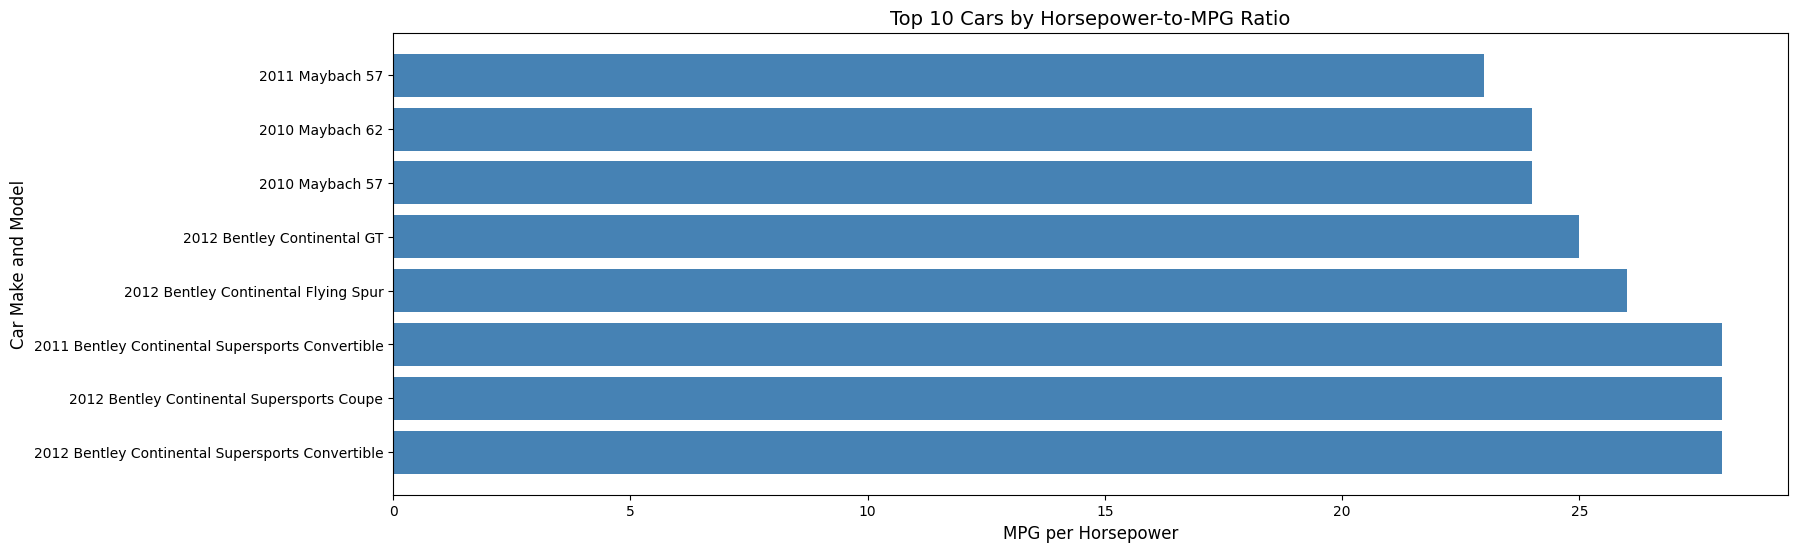

In [12]:
# Q6: Top Performance Cars by Efficiency

file_path = r"..\results\q06_hp_to_mpg.csv"
hp_to_mpg  = pd.read_csv(file_path)

plt.figure(figsize = (18,6))

plt.barh(hp_to_mpg["model_year"], hp_to_mpg["hp_to_mpg_ratio"], color="steelblue")

plt.title("Top 10 Cars by Horsepower-to-MPG Ratio", fontsize=14)
plt.xlabel("MPG per Horsepower", fontsize=12)
plt.ylabel("Car Make and Model", fontsize=12)

plt.tight_layout
plt.show()

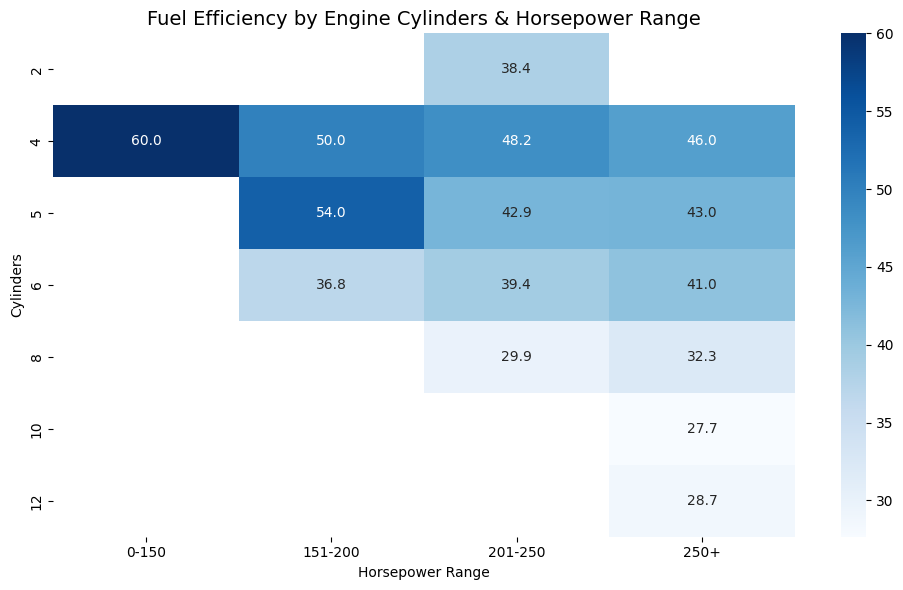

In [11]:
# Q7: Top Efficiency by Engine Type and Horsepower

import seaborn as sns

file_path = r"..\results\q07_engine_type_hp_to_mpg.csv"

df = pd.read_csv(file_path)

pivot = df.pivot(index="cylinders", columns="hp_range", values="avg_mpg")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")

plt.title("Fuel Efficiency by Engine Cylinders & Horsepower Range", fontsize=14)
plt.xlabel("Horsepower Range")
plt.ylabel("Cylinders")
plt.tight_layout()
plt.show()

## Power BI Dashboard <a name="powerbi"></a>

Built an Interactive dashboard with:
- **Filters**: Year, Make, Fuel Type
- **Charts**:
  - Top manufacturers by MPG
  - Fuel type distribution
  - Horsepower vs MPG scatter
  - Cylinders vs MPG comparison
  - **KPI Cards**: Best car by efficiency, Worst car by efficiency


## Conclusions <a name="conclusion"></a>

* Smaller engines and fewer cylinders generally result in higher MPG.
* Higher horsepower strongly correlates with lower fuel efficiency.
* Some manufacturers consistently appear among the most fuel efficient.
* Fuel type distribution shows gasoline dominance; diesel and compressed fuel are rare.
* The Power BI dashboard provides an interactive way to explore trade-offs between efficiency and performance.